# $$ \hat{y} = \theta_0 + \theta_1x_i  $$

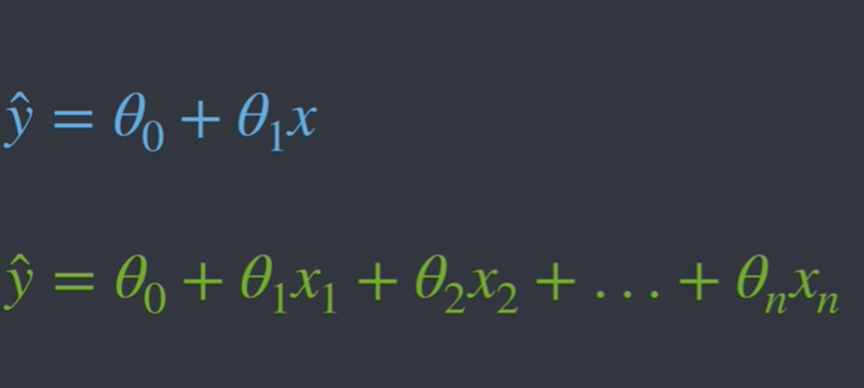

# $$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 +.............+ \theta_nx_n  $$

In [1]:
# $$ \hat{y} = \theta_0 + \theta_1x_i  $$
# $$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 +.............+ \theta_nx_n  $$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.simplefilter('ignore')


from sklearn.datasets import load_boston

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [3]:
boston_dataset = load_boston()

In [4]:
type(boston_dataset)

sklearn.utils.Bunch

In [5]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print(boston_dataset.filename)

C:\Users\manch\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [11]:
print(boston_dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [12]:
data=pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [13]:
data['PRICE'] = boston_dataset.target

In [14]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [15]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [16]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [17]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [18]:
pd.isnull(data)

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  PRICE  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [19]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [21]:
# plotting...visualisation

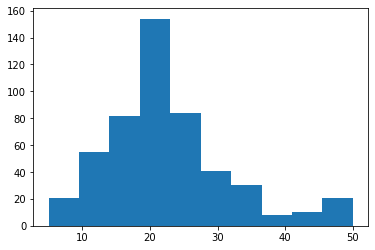

In [22]:
plt.hist(data['PRICE'])
plt.show()

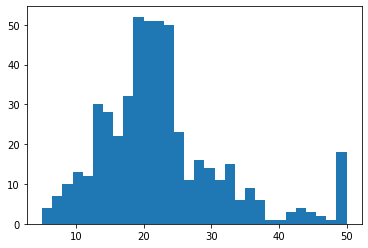

In [23]:
plt.hist(data['PRICE'], bins = 30)
plt.show()

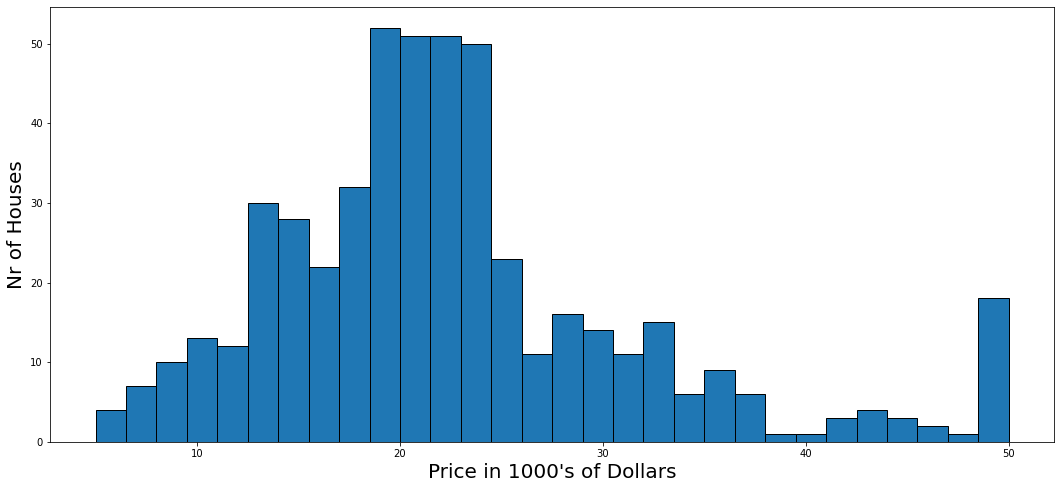

In [24]:
plt.figure(figsize =(18, 8))
plt.hist(data['PRICE'], bins = 30, ec = 'black')
plt.xlabel('Price in 1000\'s of Dollars', fontsize = 20)
plt.ylabel('Nr of Houses', fontsize = 20)
plt.show()

In [25]:
data['PRICE'].mean()

22.532806324110698

In [26]:
data['PRICE'].median()

21.2

In [27]:
# mean and median are different.....SO that means the data is not normally distributed

In [28]:
# what is a normal distribution

In [29]:
# seaborn............

https://seaborn.pydata.org/tutorial.html

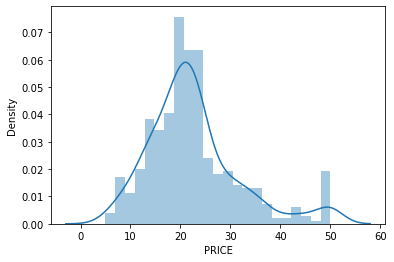

In [30]:
sns.distplot(data['PRICE'])
plt.show()

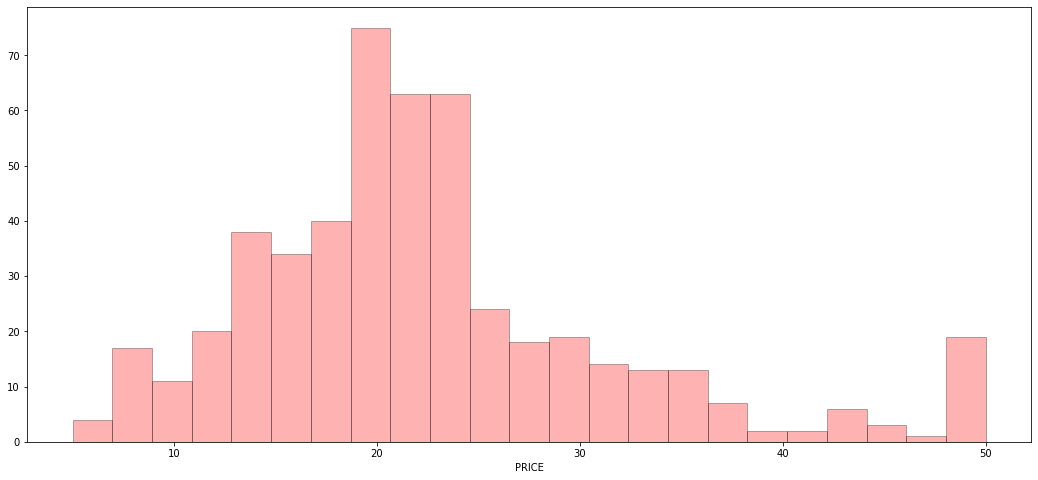

In [31]:
plt.figure(figsize =(18, 8))
sns.distplot(data['PRICE'], hist=True,kde=False, hist_kws={'ec':'black', 'color': 'red', 'alpha': 0.3})
plt.show()

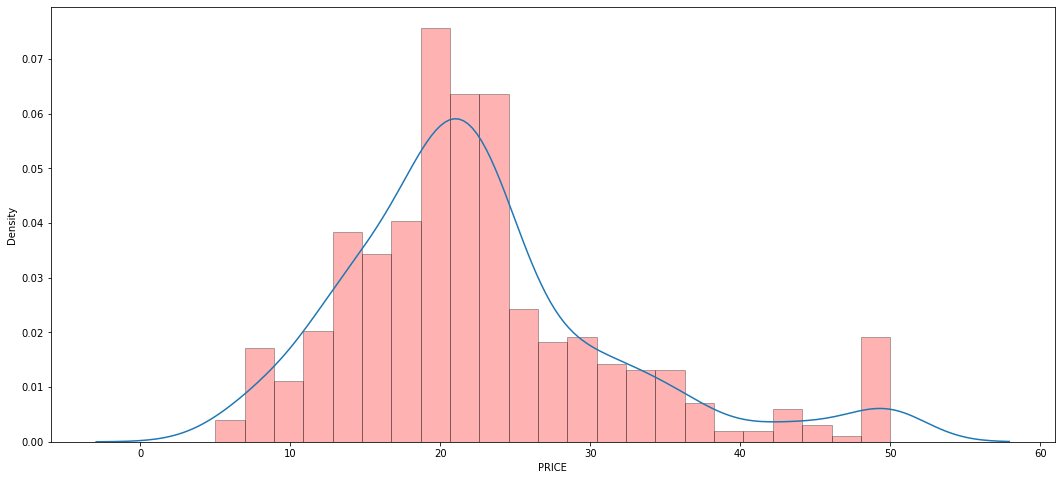

In [32]:
plt.figure(figsize =(18, 8))
sns.distplot(data['PRICE'], hist=True,kde=True, hist_kws={'ec':'black', 'color': 'red', 'alpha': 0.3})
plt.show()

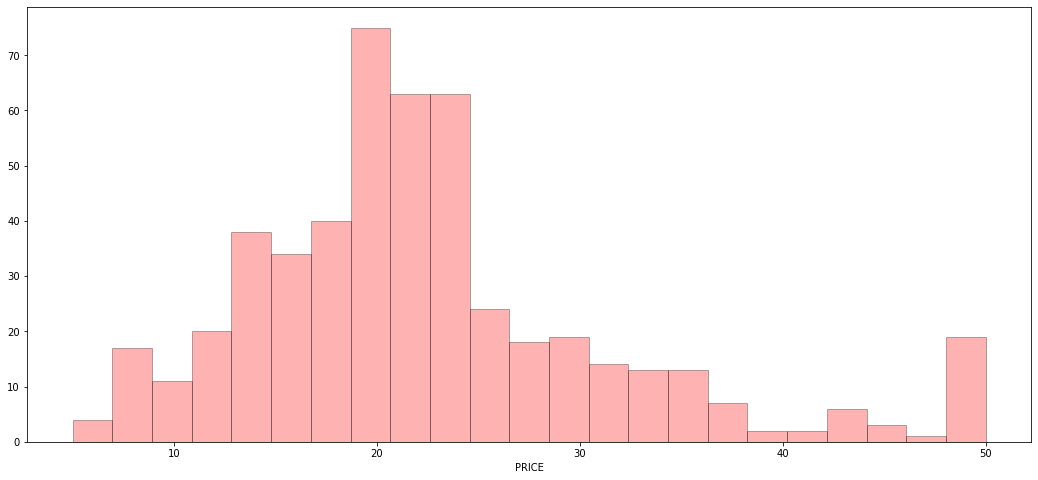

In [33]:
plt.figure(figsize =(18, 8))
sns.distplot(data['PRICE'], hist=True,kde=False, hist_kws={'ec':'black', 'color': 'red', 'alpha': 0.3})
plt.show()

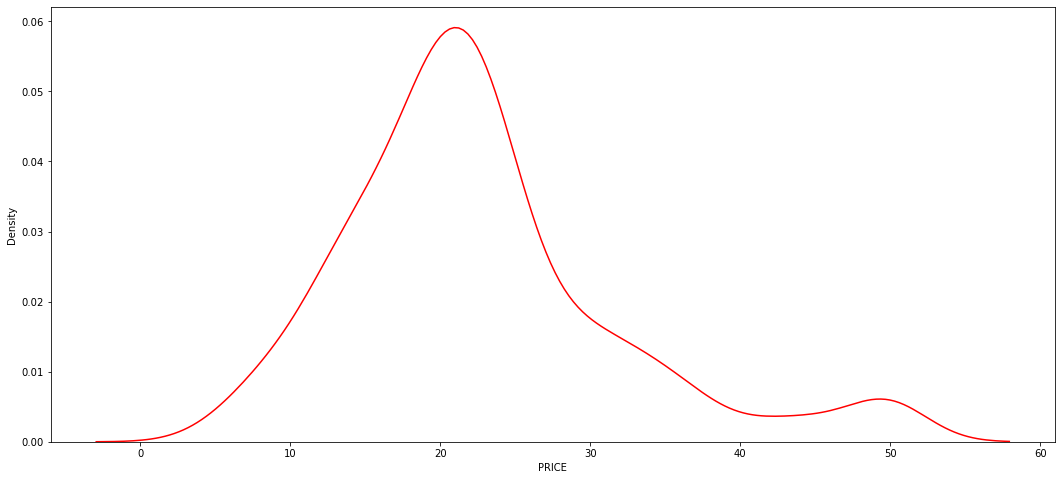

In [34]:
plt.figure(figsize =(18, 8))
sns.distplot(data['PRICE'], hist=False,kde=True, kde_kws={'color': 'red'})
plt.show()

In [35]:
data['RM'].mean()

6.284634387351787

In [36]:
data['RM'].median()

6.2085

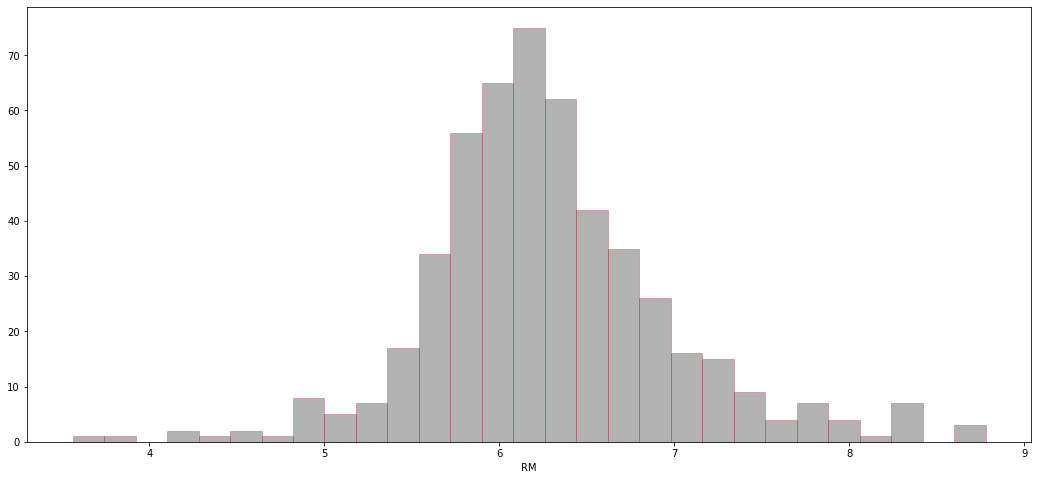

In [37]:
plt.figure(figsize =(18, 8))
sns.distplot(data['RM'], hist=True,kde=False, hist_kws={'ec':'brown', 'color': 'black', 'alpha': 0.3})
plt.show()

In [38]:
data['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [39]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [40]:
data['CHAS'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

In [41]:
data['CHAS'].index

RangeIndex(start=0, stop=506, step=1)

In [42]:
type(data['CHAS'])

pandas.core.series.Series

https://www.mathsisfun.com/data/index.html

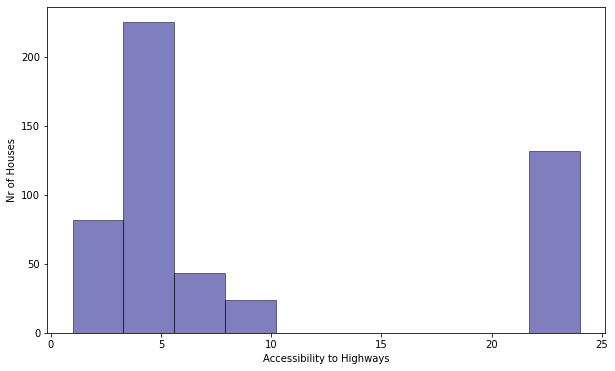

In [43]:
plt.figure(figsize =(10,6))
plt.hist(data['RAD'], ec = 'black', color = 'navy', alpha = 0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr of Houses')
plt.show()

In [44]:
accessibility=data['RAD'].value_counts()
accessibility

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [45]:
type(accessibility)

pandas.core.series.Series

In [46]:
accessibility.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

In [47]:
type(accessibility.index)

pandas.core.indexes.numeric.Float64Index

In [48]:
accessibility.values

array([132, 115, 110,  38,  26,  24,  24,  20,  17], dtype=int64)

In [49]:
type(accessibility.values)

numpy.ndarray

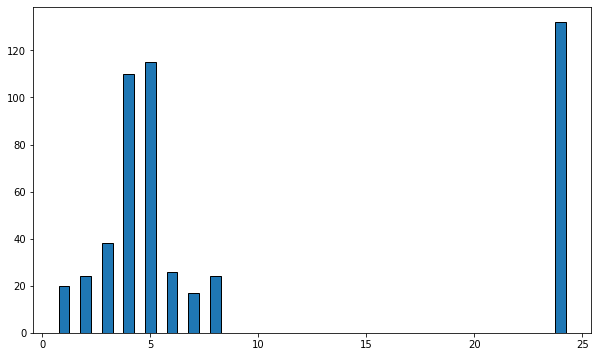

In [50]:
plt.figure(figsize =(10,6))
plt.bar(accessibility.index, accessibility.values, ec = 'black', width = 0.5)
plt.show()

In [51]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [52]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [53]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [54]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [55]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [56]:
# why plotting.......

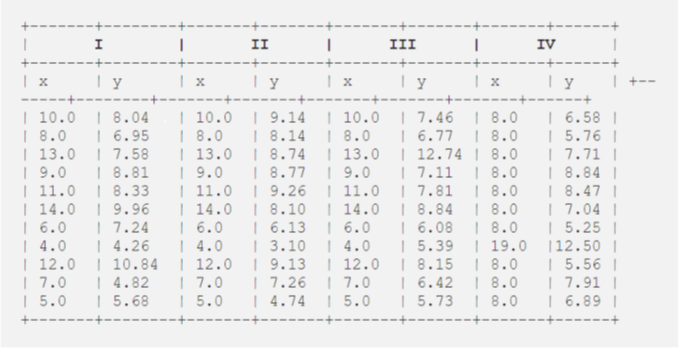

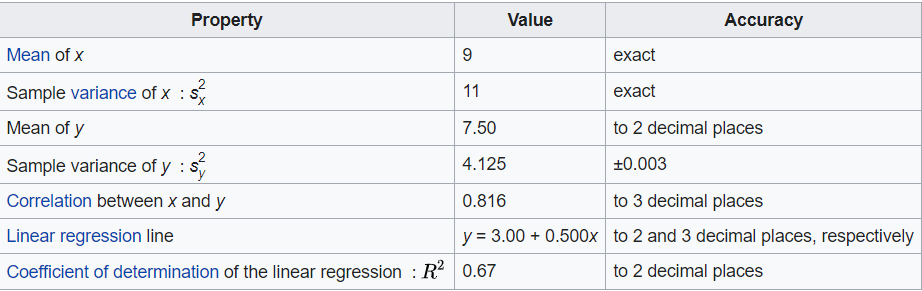

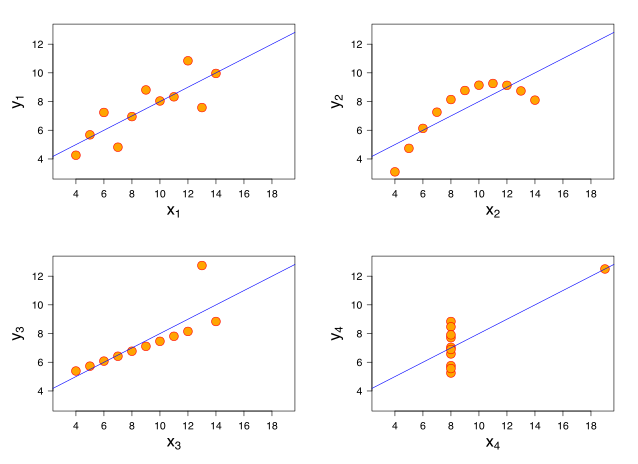

In [57]:
# Correlation

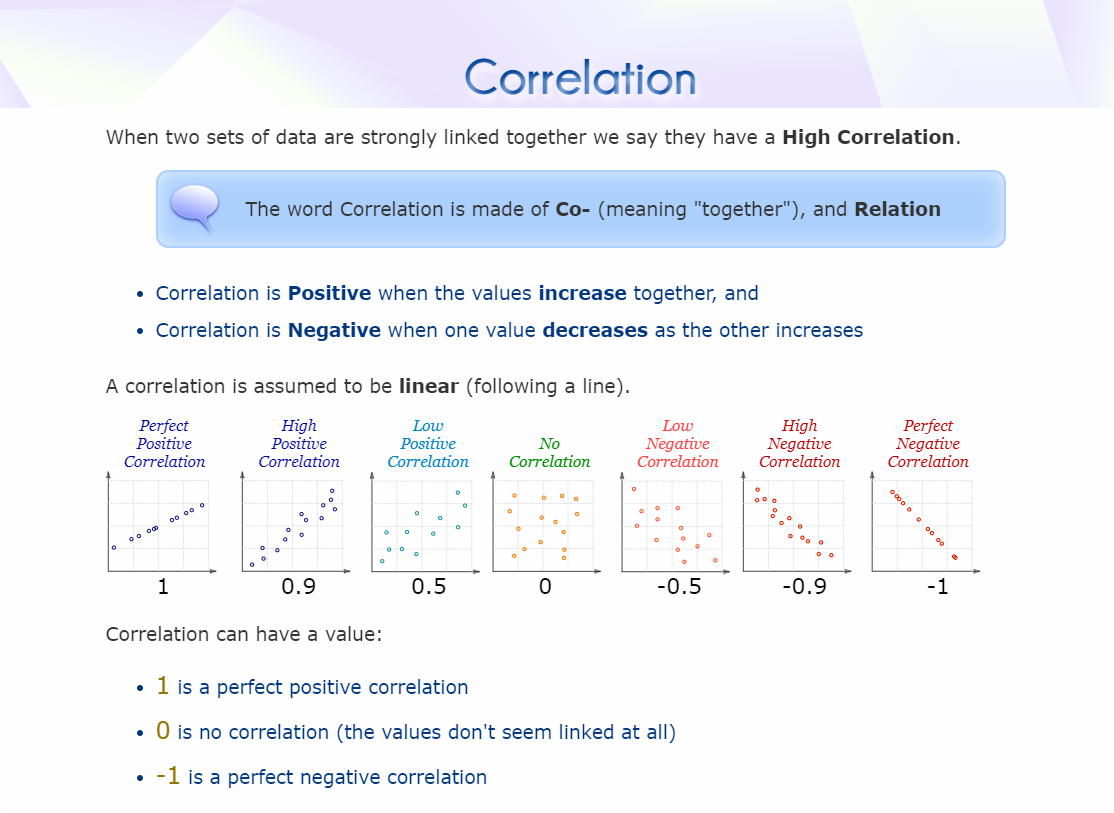

https://www.mathsisfun.com/data/correlation.html

In [58]:
data['PRICE'].corr(data['RM'])

0.695359947071539

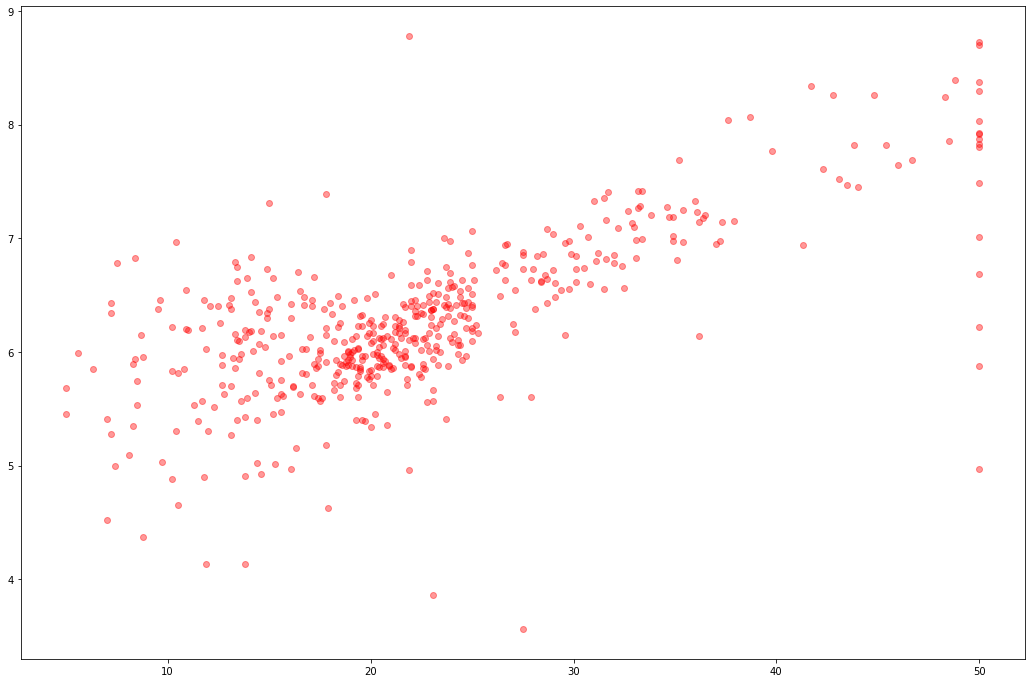

In [59]:
plt.figure(figsize = (18, 12))
plt.scatter(data['PRICE'], data['RM'], color = 'red', alpha = 0.4)
plt.show()

In [60]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [61]:
# why is this negative?

In [62]:
# I will give you 10 minutes for the answer....

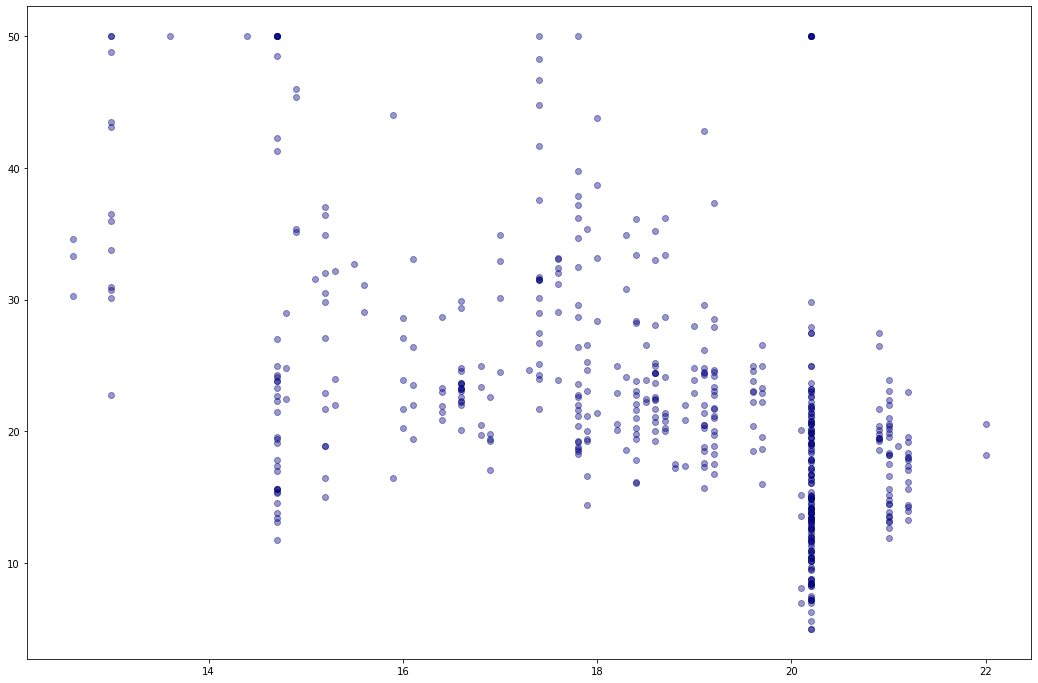

In [63]:
plt.figure(figsize = (18, 12))
plt.scatter( data['PTRATIO'],data['PRICE'], color = 'navy', alpha = 0.4)
plt.show()

In [64]:
data['NOX'].corr(data['PRICE'])

-0.4273207723732824

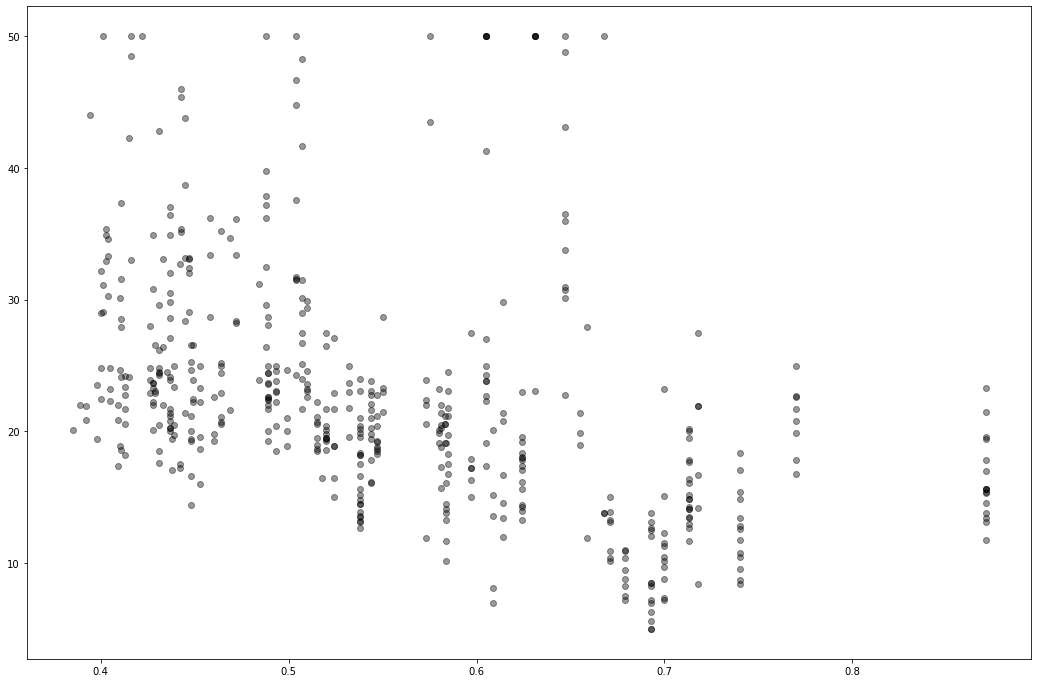

In [65]:
plt.figure(figsize = (18, 12))
plt.scatter( data['NOX'],data['PRICE'], color = 'black', alpha = 0.4)
plt.show()

In [66]:
data['CHAS'].corr(data['PRICE']) # it means the houses close to the river banks are priced marginally higher

0.17526017719029818

In [67]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [68]:
# Heat map

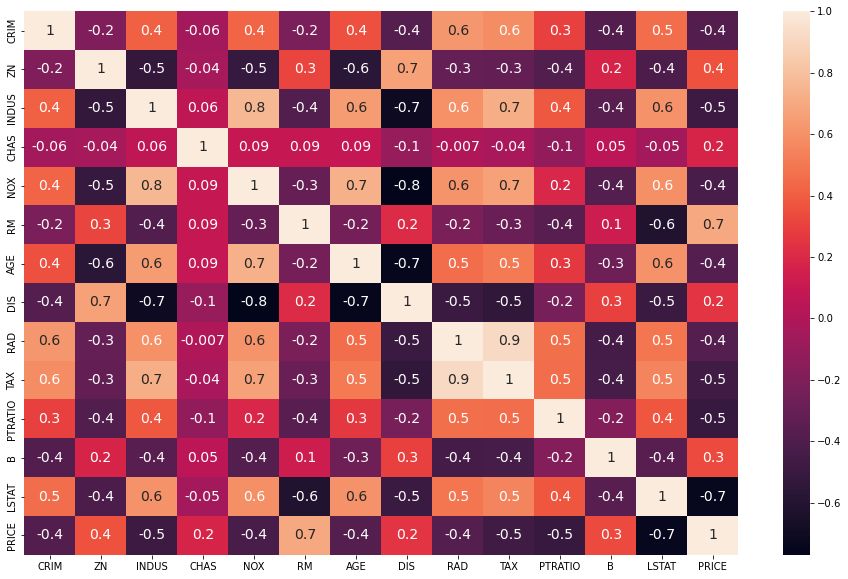

In [69]:
plt.figure(figsize =(16,10))

sns.heatmap(data.corr(), annot = True, annot_kws = {'size':14}, fmt = '.1g',  mask=None)

plt.show()

In [70]:
# mask : boolean array or DataFrame, optional
#     If passed, data will not be shown in cells where ``mask`` is True.
#     Cells with missing values are automatically masked.

In [71]:
data.corr().shape

(14, 14)

In [72]:
masker = np.zeros_like(data.corr())

In [73]:
masker.shape

(14, 14)

In [74]:
masker

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [75]:
triangle_indices=np.triu_indices_from(masker)
masker[triangle_indices] = True
masker

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

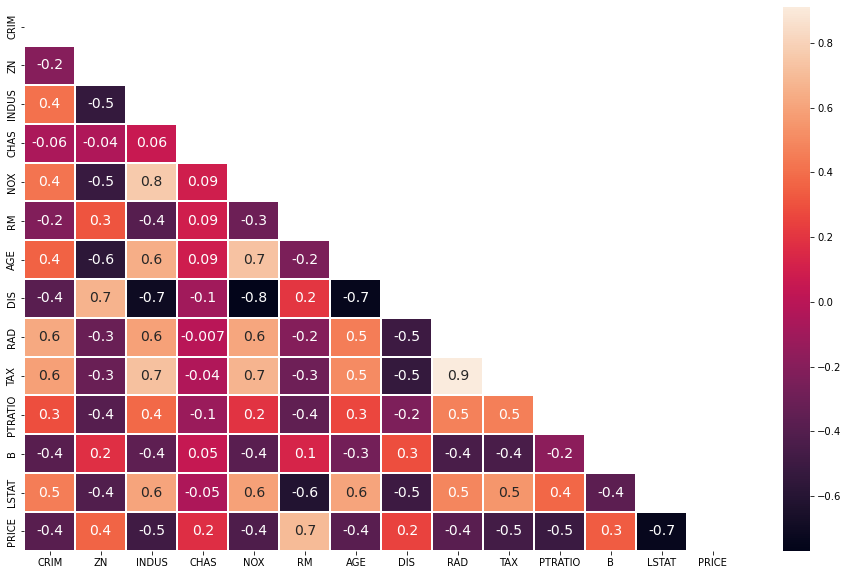

In [76]:
plt.figure(figsize =(16,10))

sns.heatmap(data.corr(), annot = True, annot_kws = {'size':14}, fmt = '.1g',  mask=masker, linewidths = 0.3)

plt.xticks(fontsize = 10)

plt.yticks(fontsize = 10)


plt.show()

In [77]:
# Home work....

In [78]:
# why is there a -ve correlation between the PRICE and LSTAT
# why is there a +ve correlation between the TAX and NOX
# why is there a -ve correlation between the DIS and NOX

In [79]:
# why is there a -ve correlation between the PRICE and LSTAT
# LSTAT    % lower status of the population
# Lower status....low income...not very educated....more crimes...more fights...more problems in the area...
# would you want to go and buy a house there?.....no...not at all...
# hence houses in such areas will have low demand..and hence the negative correlation...between PRICE and LSTAT
# to prove that there is a corelation between...LSTAT and CRIM lets examine the data...
# heat map....for the CORR
# there is a positive correlation between CRIM and LSTAT...that proves the point..

In [80]:
# why is there a +ve correlation between the TAX and NOX
# NOX.....nitrous oxide pollutant found in areas where there are industries...
# TAX.....looks to be higher in areas where there are more industries...that sounds logical..
# INDUS    proportion of non-retail business acres per town?....what is that?.....is that Industrial Area or Residential Area?
# if INDUS is industrial Area...then there must a positive correlation between INDUS and NOX....INDUS and TAX
# we have found that there is a positive correlation between INDUS and TAX...0.7
# we have found that there is a positive correlation between INDUS and NOX....0.8
# so INDUSTRIAL AREAS HAVE TO PAY HIGHER TAX, ALSO THEY ARE MORE POLLUTED..

In [81]:
# why is there a -ve correlation between the DIS and NOX...
# DIS      weighted distances to five Boston employment centres...
# NOX      nitrous oxide concentration..
# Employment centres were mostly factories those days...located in industrial areas..
# far away from the industrial area then there will less NOX...and hence the neagative correalation...
# there must be a -ve correlation between DIS and TAX..?
# can we check? ...its negative -0.5....

In [82]:
# seaborn plotting...

https://seaborn.pydata.org/tutorial.html

In [83]:
import seaborn as sns

In [84]:
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional

In [85]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

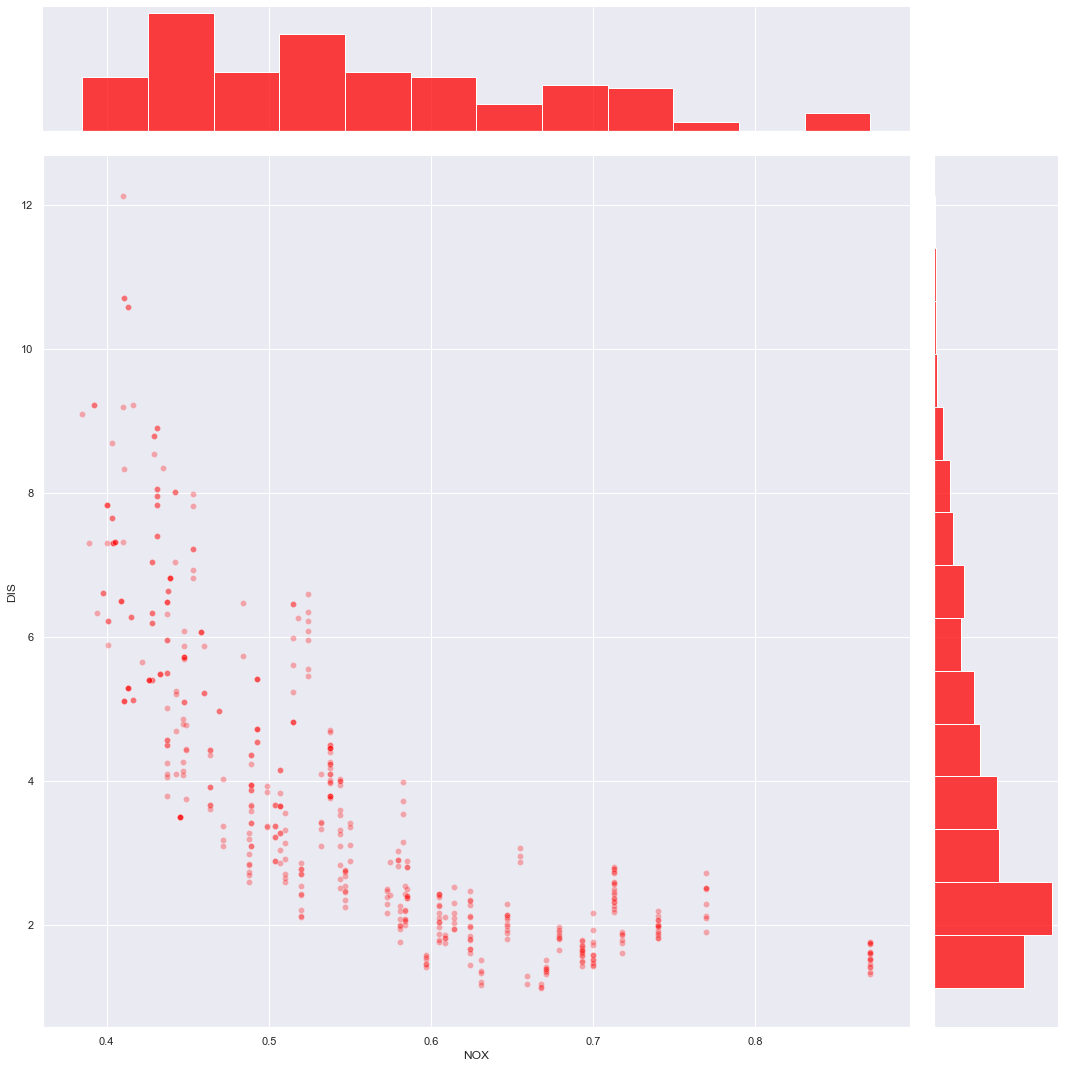

In [86]:
sns.set()
sns.set_style('darkgrid')
sns.jointplot(x = data['NOX'] , y = data['DIS'], color='red', alpha = 0.3,  height=15, ratio=6, kind='scatter')

plt.show()

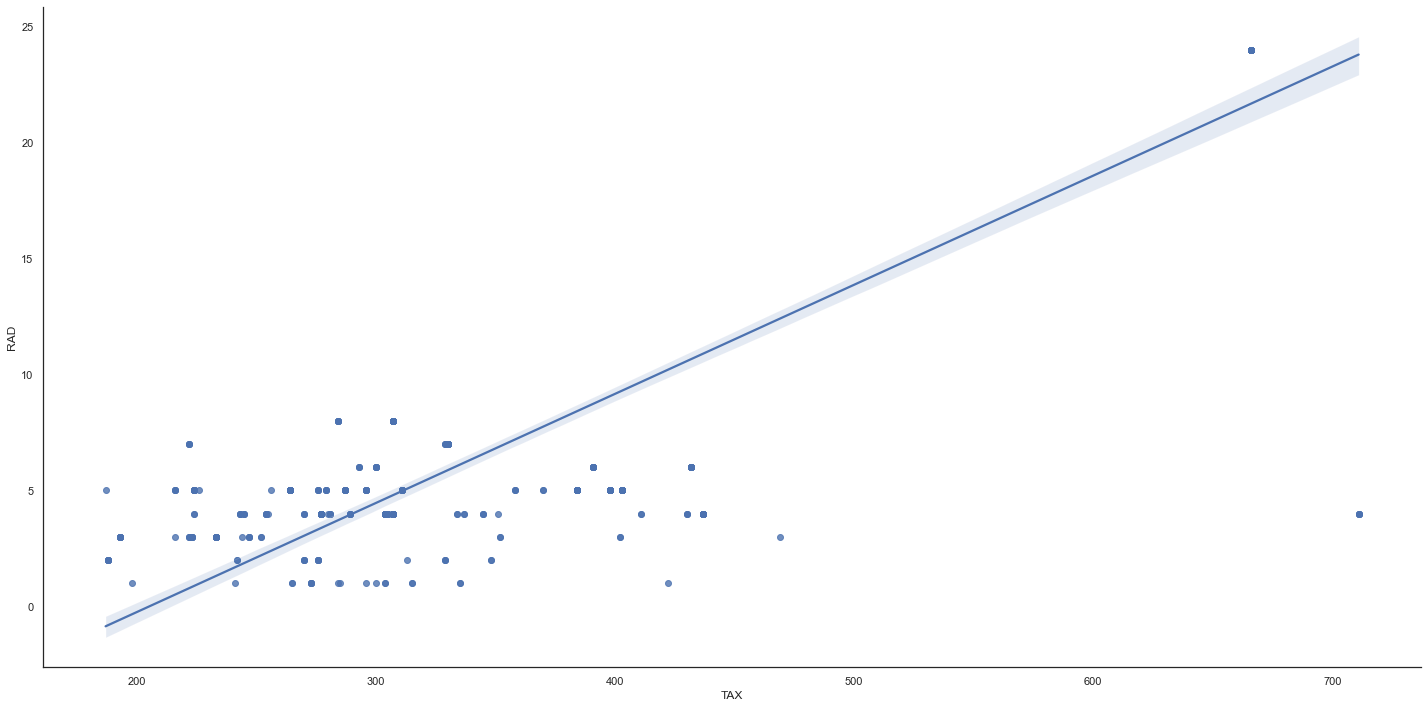

In [87]:
sns.set()
sns.set_style('white')
sns.lmplot(x = 'TAX', y = 'RAD', data = data, height=10, aspect=2)
plt.show()

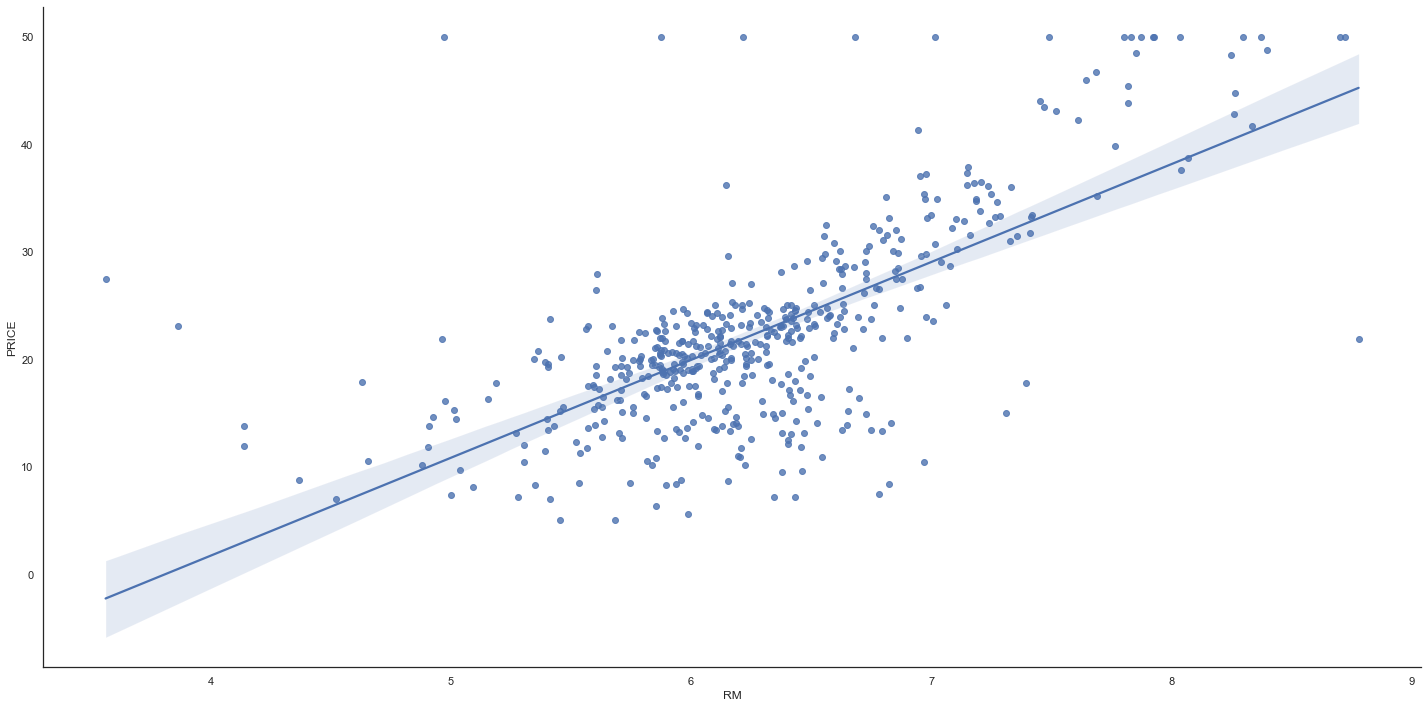

In [88]:
sns.set()
sns.set_style('white')
sns.lmplot(x = 'RM', y = 'PRICE', data = data, height=10, aspect=2)
plt.show()

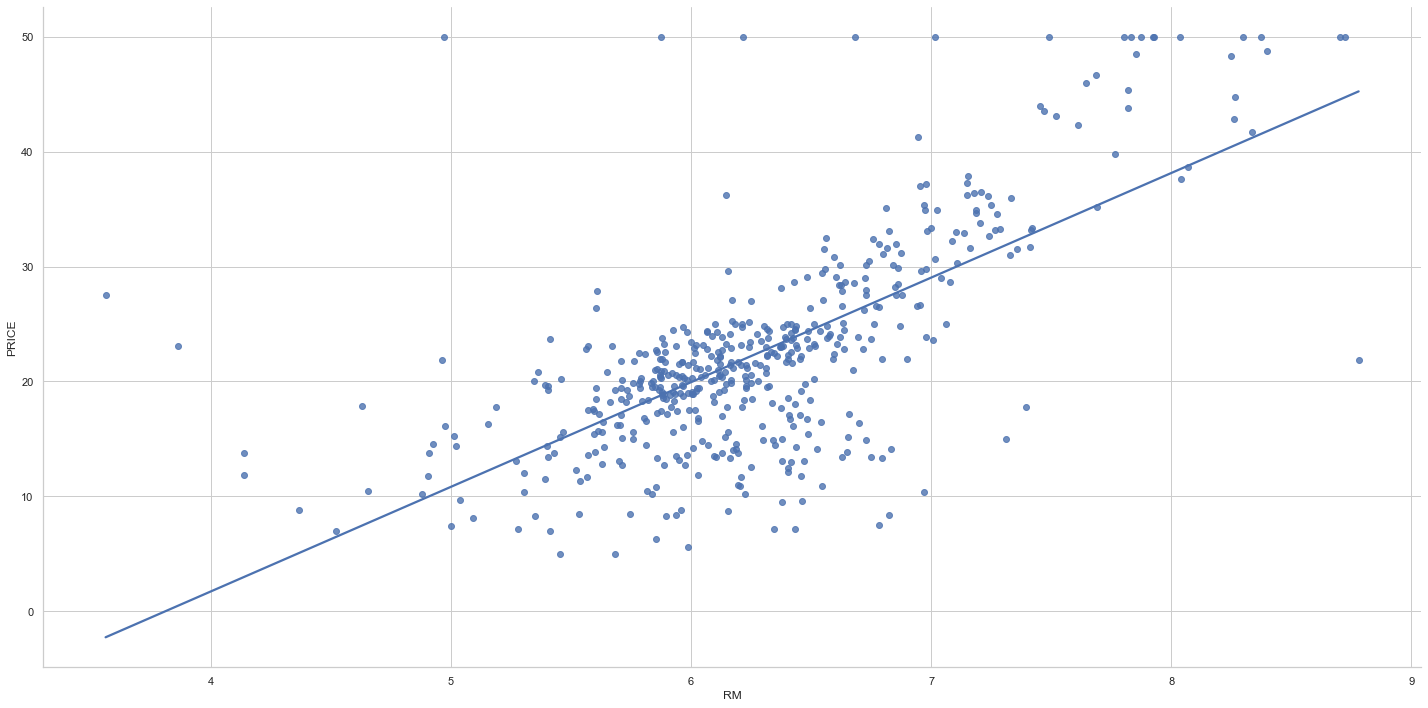

In [89]:
sns.set()
sns.set_style('whitegrid')
sns.lmplot(x = 'RM', y = 'PRICE', data = data, height=10, aspect=2, ci = None)
plt.show()

In [90]:
# Multivariable regression...

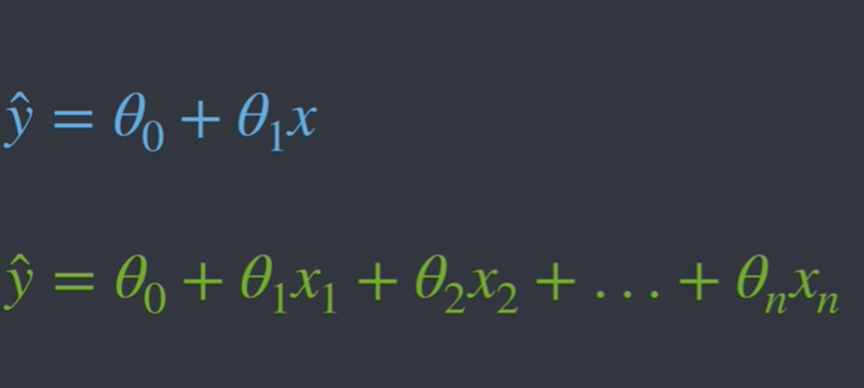

In [91]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [92]:
prices = data['PRICE']
prices

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [93]:
features = data.drop('PRICE', axis =1)
features

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [94]:
# split this data into train and test...
# train...x_train and y_train...x_train will hold 80% of the  features...y_train will hold 80% the prices
# test....x_test and y_test....x_test will hold 20% the featues...y_test will hold 20% the prices
# from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)

In [96]:
X_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
125   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0  188.0   
265   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0  264.0   

     PTRATIO       B  LSTAT  
50      16.8  395.56  13.45  
367     20.2  131.42  13.33  
34      21.0  248.31  20.34  
78      18.7  386.40  12.34  
172     16.6  396.90  14.69  
..       ...     ...    ...  
320     19.6  396.90   7.20  
15      21.0  395.62   8.47  
484     20.2  370.73  13.34  
125     19.1  385.02  14.81  
265     13.0  392.40  10.45  

[404 rows x 13 columns]

In [97]:
y_train

50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: PRICE, Length: 404, dtype: float64

In [98]:
X_test

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
305  0.05479  33.0   2.18   0.0  0.472  6.616   58.1  3.3700  7.0  222.0   
193  0.02187  60.0   2.93   0.0  0.401  6.800    9.9  6.2196  1.0  265.0   
65   0.03584  80.0   3.37   0.0  0.398  6.290   17.8  6.6115  4.0  337.0   
349  0.02899  40.0   1.25   0.0  0.429  6.939   34.5  8.7921  1.0  335.0   
151  1.49632   0.0  19.58   0.0  0.871  5.404  100.0  1.5916  5.0  403.0   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...    ...   
208  0.13587   0.0  10.59   1.0  0.489  6.064   59.1  4.2392  4.0  277.0   
174  0.08447   0.0   4.05   0.0  0.510  5.859   68.7  2.7019  5.0  296.0   
108  0.12802   0.0   8.56   0.0  0.520  6.474   97.1  2.4329  5.0  384.0   
242  0.10290  30.0   4.93   0.0  0.428  6.358   52.9  7.0355  6.0  300.0   
102  0.22876   0.0   8.56   0.0  0.520  6.405   85.4  2.7147  5.0  384.0   

     PTRATIO       B  LSTAT  
305     18.4  393.36   8.93  
193     15.6  393.37   5.03  
65      16.1  396.90   4.67  
349     19.7  389.85   5.89  
151     14.7  341.60  13.28  
..       ...     ...    ...  
208     18.6  381.32  14.66  
174     16.6  393.23   9.64  
108     20.9  395.24  12.27  
242     16.6  372.75  11.22  
102     20.9   70.80  10.63  

[102 rows x 13 columns]

In [99]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: PRICE, Length: 102, dtype: float64

In [100]:
len(features)

506

In [101]:
len(X_train)

404

In [102]:
round(len(X_train)/len(features),2)*100 # train_size

80.0

In [103]:
round(len(X_test)/len(features),2)*100 # test_size

20.0

In [104]:
regr = LinearRegression() # training the model
regr.fit(X_train, y_train)

LinearRegression()

In [105]:
regr.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [106]:
regr.intercept_

36.53305138282439

In [107]:
pd.DataFrame(data =regr.coef_ , index = X_train.columns, columns = ['Coef'])

Coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [108]:
regr.score(X_train, y_train)

0.750121534530608

In [109]:
regr.score(X_test, y_test)

0.6709339839115628

In [110]:
data['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

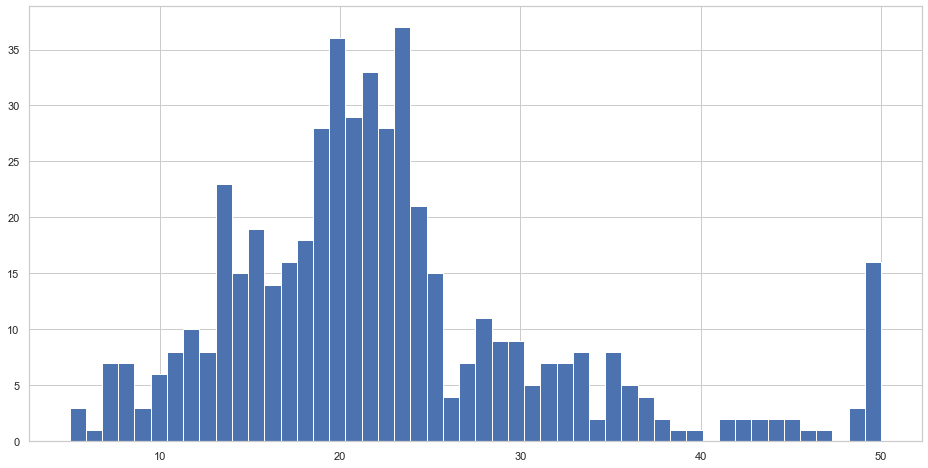

In [111]:
plt.figure(figsize= (16,8))
plt.hist(data['PRICE'], bins = 50)
plt.show()

In [112]:
data['PRICE'].skew()

1.1080984082549072

In [113]:
# Data Transformation...

In [114]:
A = 90
B = 50

In [115]:
A-B

40

In [116]:
np.log(A)

4.499809670330265

In [117]:
np.log(B)

3.912023005428146

In [118]:
np.log(A) - np.log(B)

0.5877866649021191

In [119]:
y_log=np.log(data['PRICE'])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [120]:
y_log.skew()

-0.33032129530987864

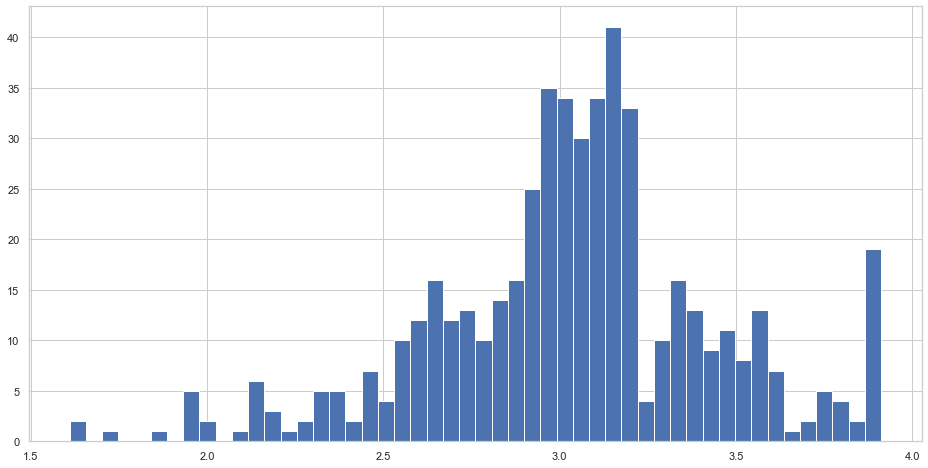

In [121]:
plt.figure(figsize= (16,8))
plt.hist(y_log, bins = 50)
plt.show()

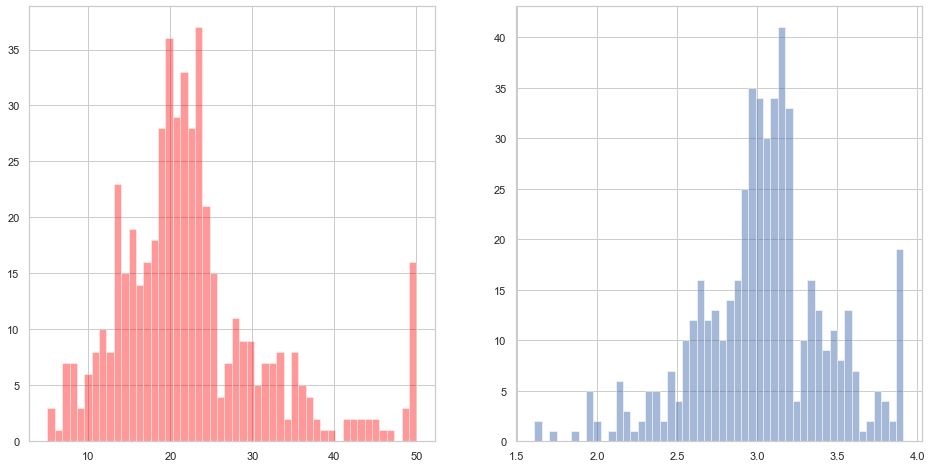

In [122]:
plt.figure(figsize= (16,8))

plt.subplot(1,2,1)
plt.hist(data['PRICE'], bins = 50, color = 'red', alpha = 0.4)


plt.subplot(1,2,2)
plt.hist(y_log, bins = 50, alpha = 0.5)

plt.show()

In [123]:
# do a regression after data transformation ...that means...prices will be log prices..

In [124]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [125]:
log_prices = np.log(data['PRICE'])

In [126]:
features = data.drop(['PRICE'], axis = 1)

In [127]:
log_prices

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [128]:
features

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [129]:
X_train, X_test, y_train, y_test =train_test_split(features, log_prices, test_size = 0.2, random_state = 10)

In [130]:
regr.fit(X_train, y_train)

LinearRegression()

In [131]:
regr.coef_

array([-1.06717261e-02,  1.57929102e-03,  2.02989827e-03,  8.03305301e-02,
       -7.04068057e-01,  7.34044072e-02,  7.63301755e-04, -4.76332789e-02,
        1.45651350e-02, -6.44998303e-04, -3.47947628e-02,  5.15896157e-04,
       -3.13900565e-02])

In [132]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) # after data transformation...

coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [133]:
regr.intercept_

4.05994387177519

In [134]:
regr.score(X_train, y_train)

0.7930234826697583

In [135]:
regr.score(X_test, y_test)

0.7446922306260724

In [136]:
# So, data transformation has improved the scores....
# So we will keep the transformation..

In [137]:
# Plots with sns....

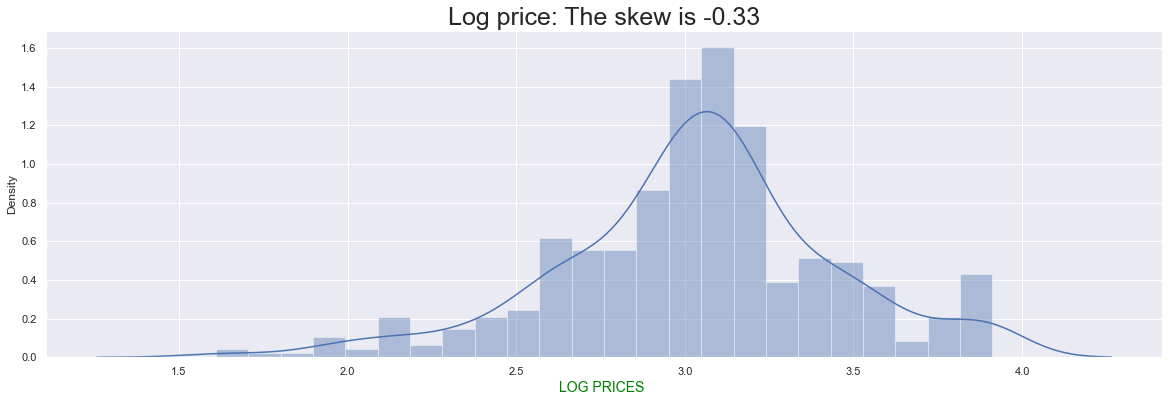

In [138]:
sns.set()
plt.figure(figsize=(20,6))
sns.distplot(y_log)
plt.title(f'Log price: The skew is {round(y_log.skew(),2)}', fontsize = 25)# note the f string used to print the y_log.skew()
plt.xlabel('LOG PRICES ', fontsize =14, color = 'green' )
plt.show()

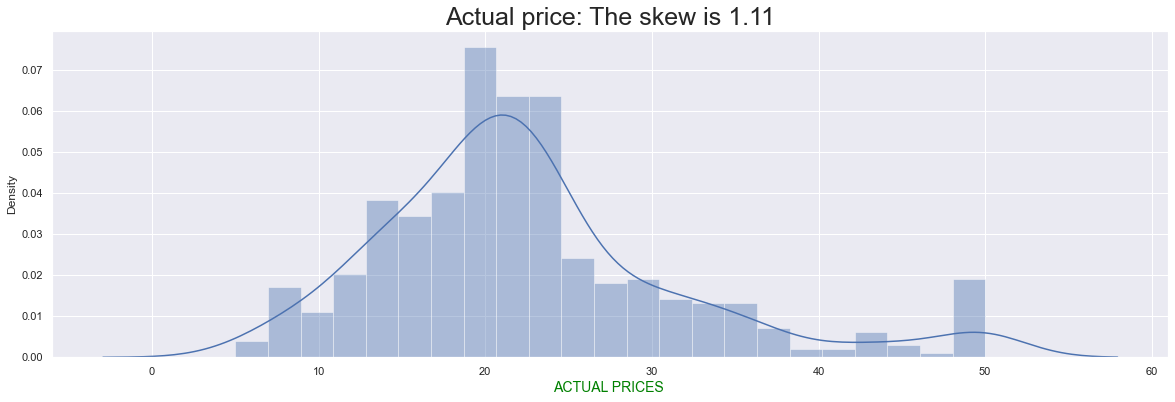

In [139]:
skew=round(data['PRICE'].skew(),2)
sns.set()
plt.figure(figsize=(20,6))
sns.distplot(data['PRICE'])
plt.title(f'Actual price: The skew is {skew}', fontsize = 25)
plt.xlabel( 'ACTUAL PRICES ', fontsize =14, color = 'green' )
plt.show()

In [140]:
# we are going to conduct further tests on the data.....
# do we need all these features ...`13 of them..?
# Is there a problem of multicollinearity amongst the features...check VIF....?
# Are all these features really related to the price..target....check for p values???

In [141]:
# hypothesis testing...

https://www.mathsisfun.com/definitions/hypothesis.html

In [142]:
# EXP HYP:-...... Varma is in love with Rani.....
# NULL HYP:-....Varma is not in love with Rani....
# GET DATA:-.... based on the null hypothesis...Varma is not in love with Rani.....
# then we are calculating the Prob...of what?... Varma is not in love with Rani....
# if P(Varma is not in love with Rani) > 0.05....null hpy may be possible...and varma might not be in love with Rani..
# if p(Varma is not in love with Rani) < 0.05 ...then null is not possible..So maybe Varma is in love with Rani...

In [143]:
# sklearn.....
# statsmodels....will allow me to do a lot of tests..also do the regression..

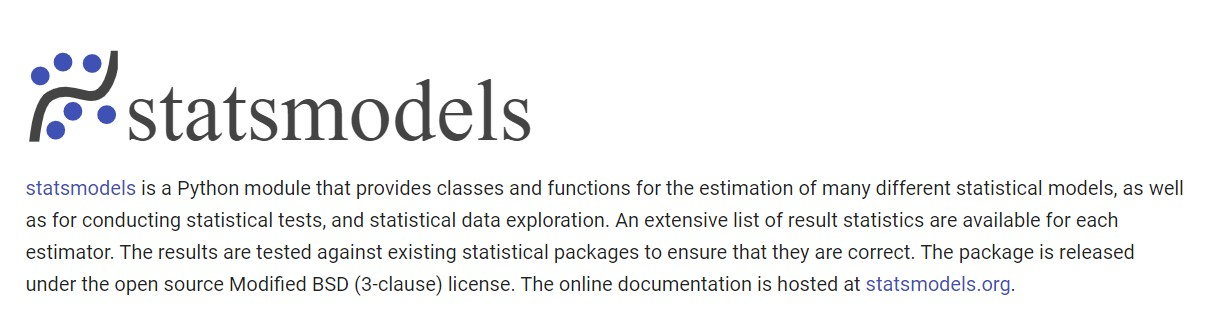

https://www.statsmodels.org/stable/index.html

In [144]:
results=sm.OLS(y_train, X_train).fit() 
# we have not added the constant to the exog...so we did not get the constant..intercept and also got wrong values of the coef..
results.params

CRIM      -0.009355
ZN         0.001657
INDUS      0.001017
CHAS       0.085902
NOX        0.954065
RM         0.312375
AGE       -0.000003
DIS        0.012034
RAD        0.000333
TAX       -0.000327
PTRATIO    0.026453
B          0.001118
LSTAT     -0.021502
dtype: float64

In [145]:
X_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
125   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0  188.0   
265   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0  264.0   

     PTRATIO       B  LSTAT  
50      16.8  395.56  13.45  
367     20.2  131.42  13.33  
34      21.0  248.31  20.34  
78      18.7  386.40  12.34  
172     16.6  396.90  14.69  
..       ...     ...    ...  
320     19.6  396.90   7.20  
15      21.0  395.62   8.47  
484     20.2  370.73  13.34  
125     19.1  385.02  14.81  
265     13.0  392.40  10.45  

[404 rows x 13 columns]

In [146]:
sm.add_constant(X_train)

const      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  \
50     1.0   0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0   
367    1.0  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0   
34     1.0   1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0   
78     1.0   0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0   
172    1.0   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0   
..     ...       ...   ...    ...   ...    ...    ...    ...     ...   ...   
320    1.0   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0   
15     1.0   0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0   
484    1.0   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0   
125    1.0   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0   
265    1.0   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0   

       TAX  PTRATIO       B  LSTAT  
50   243.0     16.8  395.56  13.45  
367  666.0     20.2  131.42  13.33  
34   307.0     21.0  248.31  20.34  
78   398.0     18.7  386.40  12.34  
172  296.0     16.6  396.90  14.69  
..     ...      ...     ...    ...  
320  287.0     19.6  396.90   7.20  
15   307.0     21.0  395.62   8.47  
484  666.0     20.2  370.73  13.34  
125  188.0     19.1  385.02  14.81  
265  264.0     13.0  392.40  10.45  

[404 rows x 14 columns]

In [147]:
results=sm.OLS(y_train, sm.add_constant(X_train)).fit() # used statsmodels...SM
results.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [148]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) # used SKlearn...

coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [149]:
regr.score(X_train, y_train)

0.7930234826697583

In [150]:
regr.score(X_test, y_test)

0.7446922306260724

In [151]:
data['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

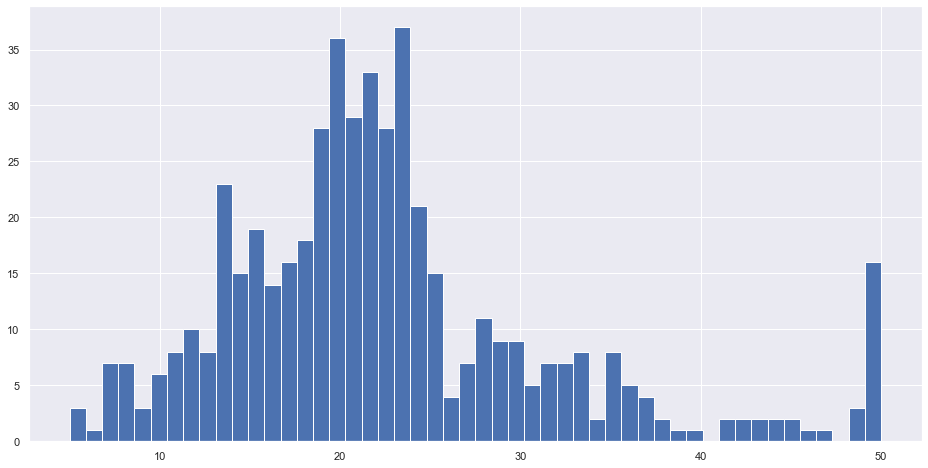

In [152]:
plt.figure(figsize= (16,8))
plt.hist(data['PRICE'], bins = 50)
plt.show()

In [153]:
data['PRICE'].skew()

1.1080984082549072

In [154]:
# Data Transformation...

In [155]:
A=90
B=50
A-B

40

In [156]:
np.log(A)

4.499809670330265

In [157]:
np.log(B)

3.912023005428146

In [158]:
np.log(A)-np.log(B)

0.5877866649021191

In [159]:
y_log=np.log(data['PRICE'])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [160]:
y_log.skew()

-0.33032129530987864

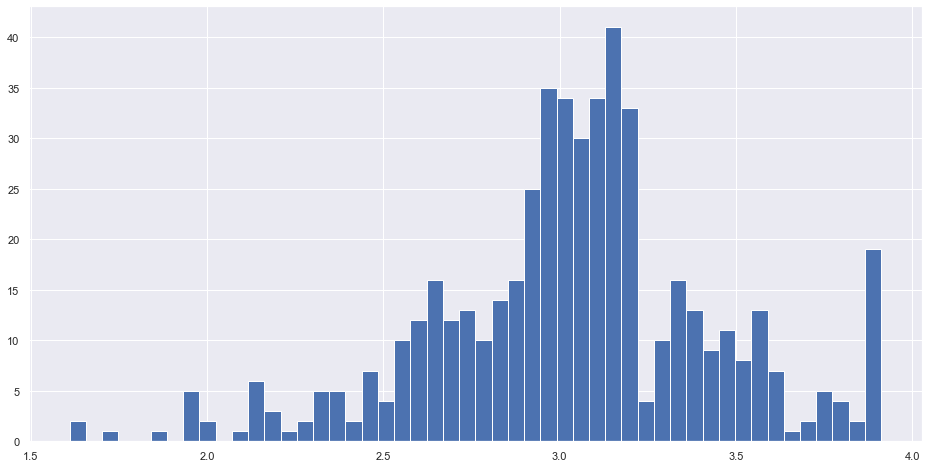

In [161]:
plt.figure(figsize= (16,8))
plt.hist(y_log, bins = 50)
plt.show()

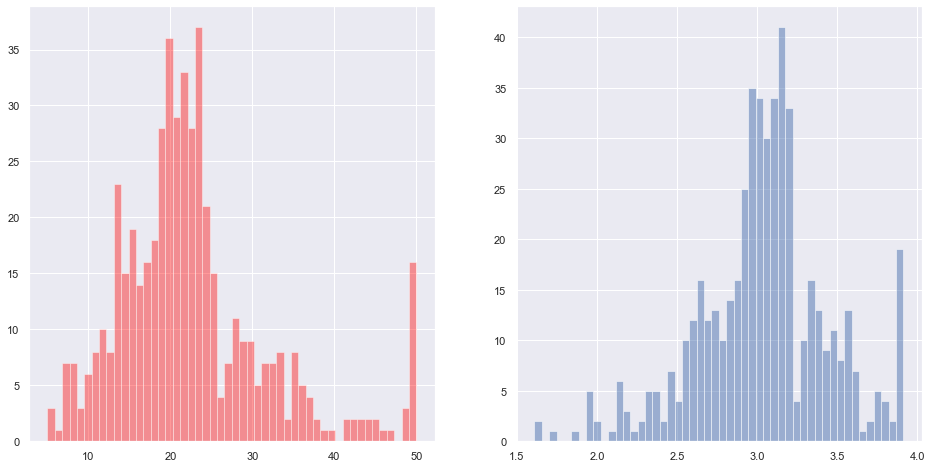

In [162]:
plt.figure(figsize= (16,8))

plt.subplot(1,2,1)
plt.hist(data['PRICE'], bins = 50, color = 'red', alpha = 0.4)


plt.subplot(1,2,2)
plt.hist(y_log, bins = 50, alpha = 0.5)

plt.show()

In [163]:
# do a regression after data transformation ...that means...prices will be log prices..

In [164]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [165]:
log_prices = np.log(data['PRICE'])

In [166]:
features = data.drop(['PRICE'], axis = 1)

In [168]:
log_prices

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [169]:
features

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [170]:
X_train, X_test, y_train, y_test =train_test_split(features, log_prices, test_size = 0.2, random_state = 10)

In [171]:
regr.fit(X_train, y_train)

LinearRegression()

In [172]:
regr.coef_

array([-1.06717261e-02,  1.57929102e-03,  2.02989827e-03,  8.03305301e-02,
       -7.04068057e-01,  7.34044072e-02,  7.63301755e-04, -4.76332789e-02,
        1.45651350e-02, -6.44998303e-04, -3.47947628e-02,  5.15896157e-04,
       -3.13900565e-02])

In [173]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) # after data transformation...

coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [174]:
regr.intercept_

4.05994387177519

In [175]:
regr.score(X_train, y_train)

0.7930234826697583

In [176]:
regr.score(X_test, y_test)

0.7446922306260724

In [177]:
# So, data transformation has improved the scores....
# So we will keep the transformation..

In [178]:
# Plots with sns....

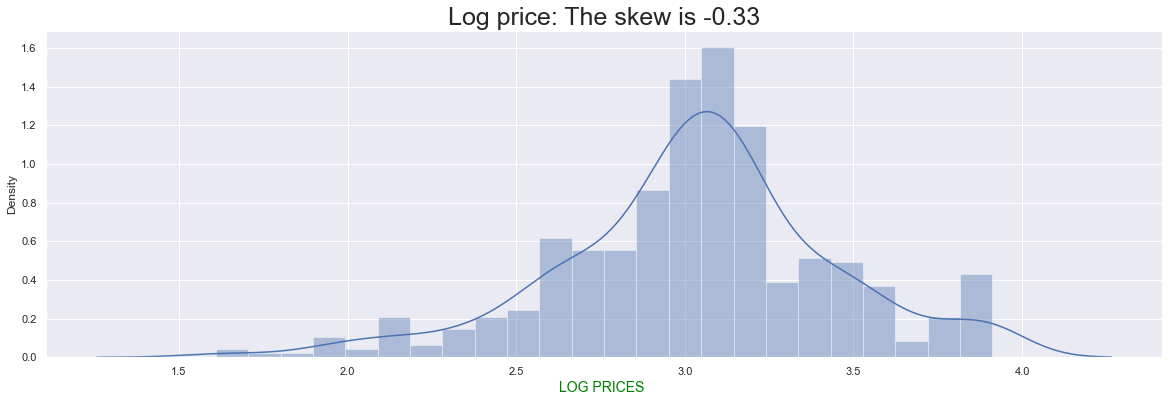

In [179]:
sns.set()
plt.figure(figsize=(20,6))
sns.distplot(y_log)
plt.title(f'Log price: The skew is {round(y_log.skew(),2)}', fontsize = 25)# note the f string used to print the y_log.skew()
plt.xlabel('LOG PRICES ', fontsize =14, color = 'green' )
plt.show()

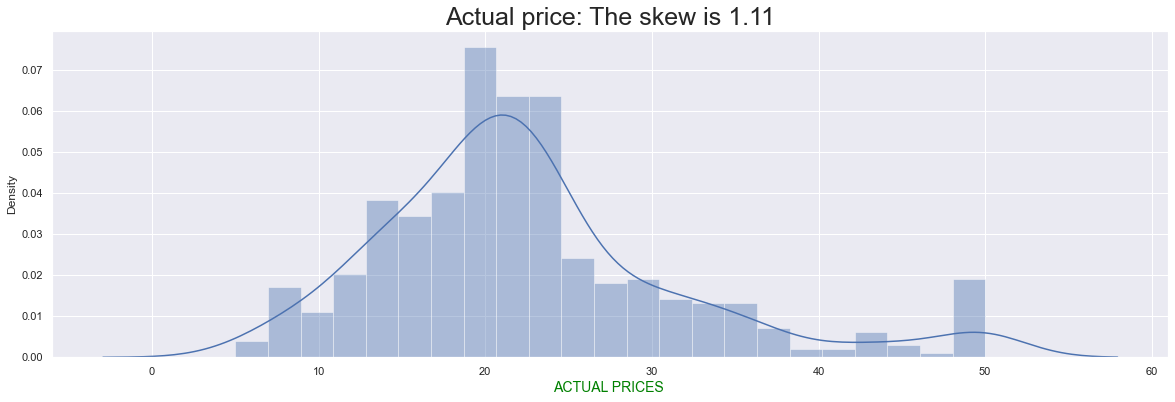

In [180]:
skew=round(data['PRICE'].skew(),2)
sns.set()
plt.figure(figsize=(20,6))
sns.distplot(data['PRICE'])
plt.title(f'Actual price: The skew is {skew}', fontsize = 25)
plt.xlabel( 'ACTUAL PRICES ', fontsize =14, color = 'green' )
plt.show()

In [181]:
# we are going to conduct further tests on the data.....
# do we need all these features ...`13 of them..?
# Is there a problem of multicollinearity amongst the features...check VIF....?
# Are all these features really related to the price..target....check for p values???

In [182]:
# hypothesis testing...

https://www.mathsisfun.com/definitions/hypothesis.html

In [183]:
# EXP HYP:-...... Varma is in love with Rani.....
# NULL HYP:-....Varma is not in love with Rani....
# GET DATA:-.... based on the null hypothesis...Varma is not in love with Rani.....
# then we are calculating the Prob...of what?... Varma is not in love with Rani....
# if P(Varma is not in love with Rani) > 0.05....null hpy may be possible...and varma might not be in love with Rani..
# if p(Varma is not in love with Rani) < 0.05 ...then null is not possible..So maybe Varma is in love with Rani...

In [184]:
# sklearn.....
# statsmodels....will allow me to do a lot of tests..also do the regression..

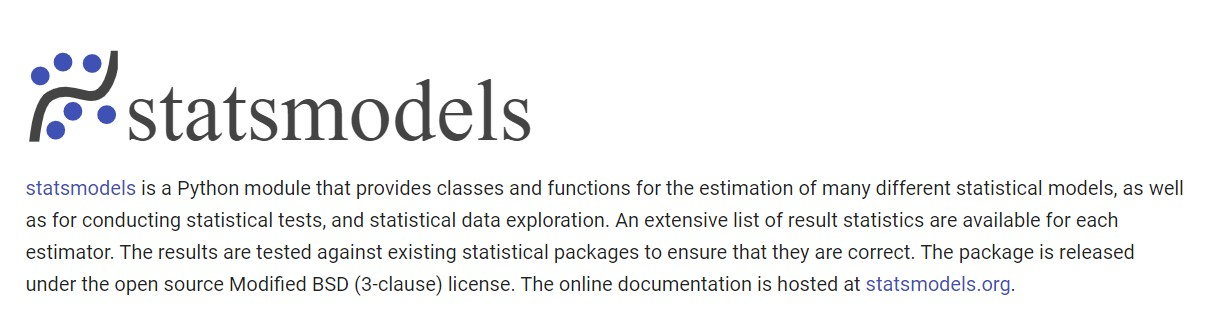

https://www.statsmodels.org/stable/index.html

In [185]:
results=sm.OLS(y_train, X_train).fit() 
# we have not added the constant to the exog...so we did not get the constant..intercept and also got wrong values of the coef..
results.params

CRIM      -0.009355
ZN         0.001657
INDUS      0.001017
CHAS       0.085902
NOX        0.954065
RM         0.312375
AGE       -0.000003
DIS        0.012034
RAD        0.000333
TAX       -0.000327
PTRATIO    0.026453
B          0.001118
LSTAT     -0.021502
dtype: float64

In [186]:
X_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
125   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0  188.0   
265   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0  264.0   

     PTRATIO       B  LSTAT  
50      16.8  395.56  13.45  
367     20.2  131.42  13.33  
34      21.0  248.31  20.34  
78      18.7  386.40  12.34  
172     16.6  396.90  14.69  
..       ...     ...    ...  
320     19.6  396.90   7.20  
15      21.0  395.62   8.47  
484     20.2  370.73  13.34  
125     19.1  385.02  14.81  
265     13.0  392.40  10.45  

[404 rows x 13 columns]

In [187]:
sm.add_constant(X_train)

const      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  \
50     1.0   0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0   
367    1.0  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0   
34     1.0   1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0   
78     1.0   0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0   
172    1.0   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0   
..     ...       ...   ...    ...   ...    ...    ...    ...     ...   ...   
320    1.0   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0   
15     1.0   0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0   
484    1.0   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0   
125    1.0   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0   
265    1.0   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0   

       TAX  PTRATIO       B  LSTAT  
50   243.0     16.8  395.56  13.45  
367  666.0     20.2  131.42  13.33  
34   307.0     21.0  248.31  20.34  
78   398.0     18.7  386.40  12.34  
172  296.0     16.6  396.90  14.69  
..     ...      ...     ...    ...  
320  287.0     19.6  396.90   7.20  
15   307.0     21.0  395.62   8.47  
484  666.0     20.2  370.73  13.34  
125  188.0     19.1  385.02  14.81  
265  264.0     13.0  392.40  10.45  

[404 rows x 14 columns]

In [188]:
results=sm.OLS(y_train, sm.add_constant(X_train)).fit() # used statsmodels...SM
results.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [189]:
round(results.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.009
INDUS      0.445
CHAS       0.038
NOX        0.000
RM         0.000
AGE        0.209
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [190]:
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

In [191]:
# Multicollinearity....
# VIF....if VIF > 10...there is multicollinearity...then we might have to drop the feature...just might have to...

In [ ]:
## $ TAX=\alpha_0+\alpha_1 RM+\alpha_3 NOX+...+\alpha_12 LSTAT$

# $$TAX=\alpha_0+\alpha_1 RM+\alpha_3 NOX+...+\alpha_12 LSTAT$$

# $$ VIF_{TAX} = \frac{1} {(1-{R^2}_{TAX})}$$

In [ ]:
# $$ VIF_{TAX} = \frac{1} {(1-{R^2}_{TAX})}$$

In [193]:
variance_inflation_factor(exog =sm.add_constant(X_train).values, exog_idx = 10 )

8.508856493040817

In [194]:
variance_inflation_factor(exog =sm.add_constant(X_train).values, exog_idx = 1)

1.7145250443932485

In [196]:
for i in range(len(sm.add_constant(X_train).columns)):
    
    print(variance_inflation_factor(exog =sm.add_constant(X_train).values, exog_idx = i),'\n')

597.5487126763895 

1.7145250443932485 

2.3328224265597584 

3.943448822674636 

1.0788133385000578 

4.410320817897635 

1.8404053075678568 

3.3267660823099408 

4.222923410477865 

7.314299817005058 

8.508856493040817 

1.839911632651406 

1.3386713255364715 

2.812544292793034 



In [197]:
# INDUS and AGE have p values greater than 0.05
# VIF looks okay....

In [198]:
# Bayesian information criterion.....BIC
# BIC?....Deals with what?....Deals with overfitiing or overlearning...

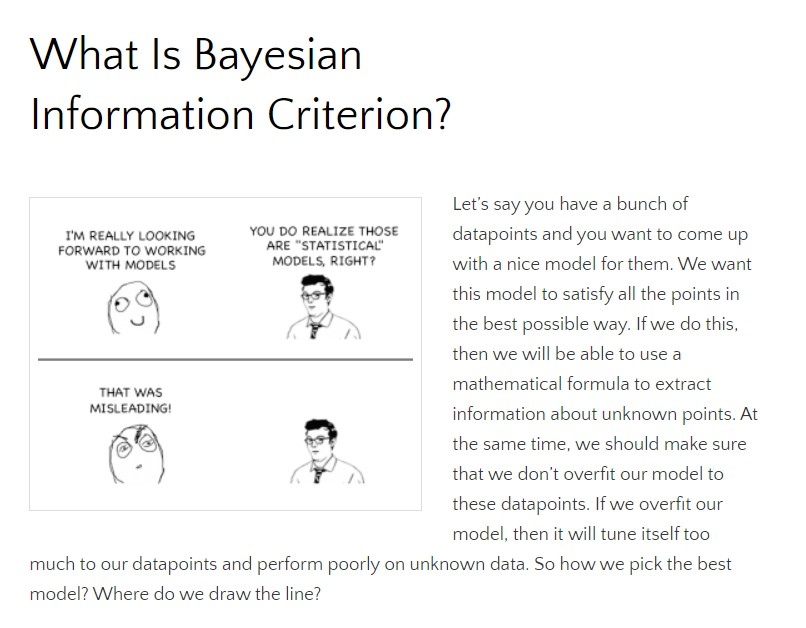

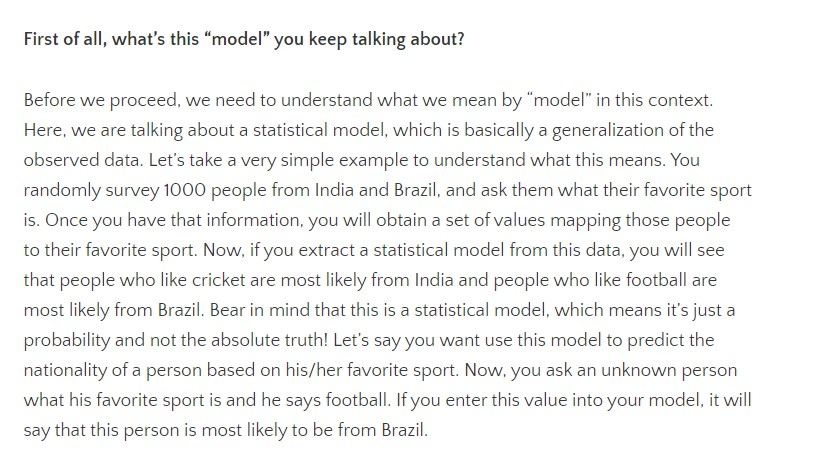

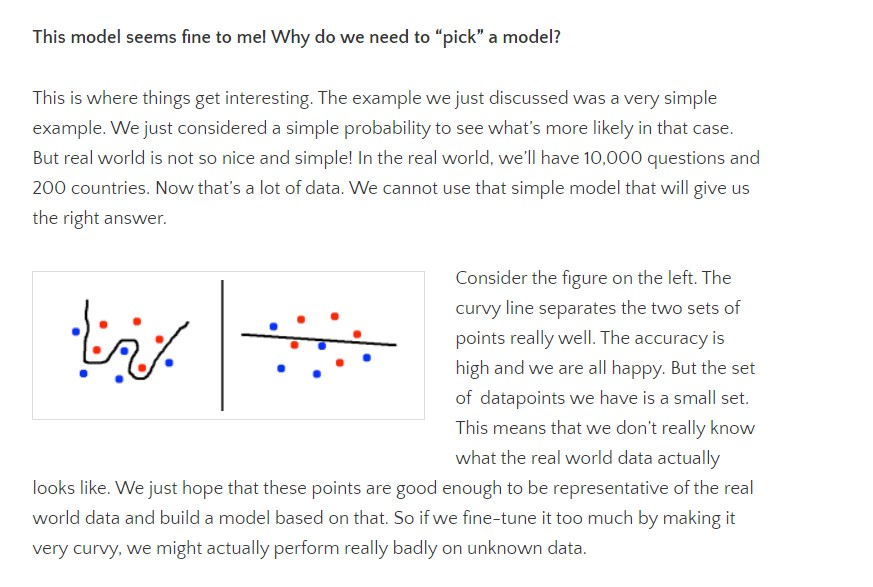

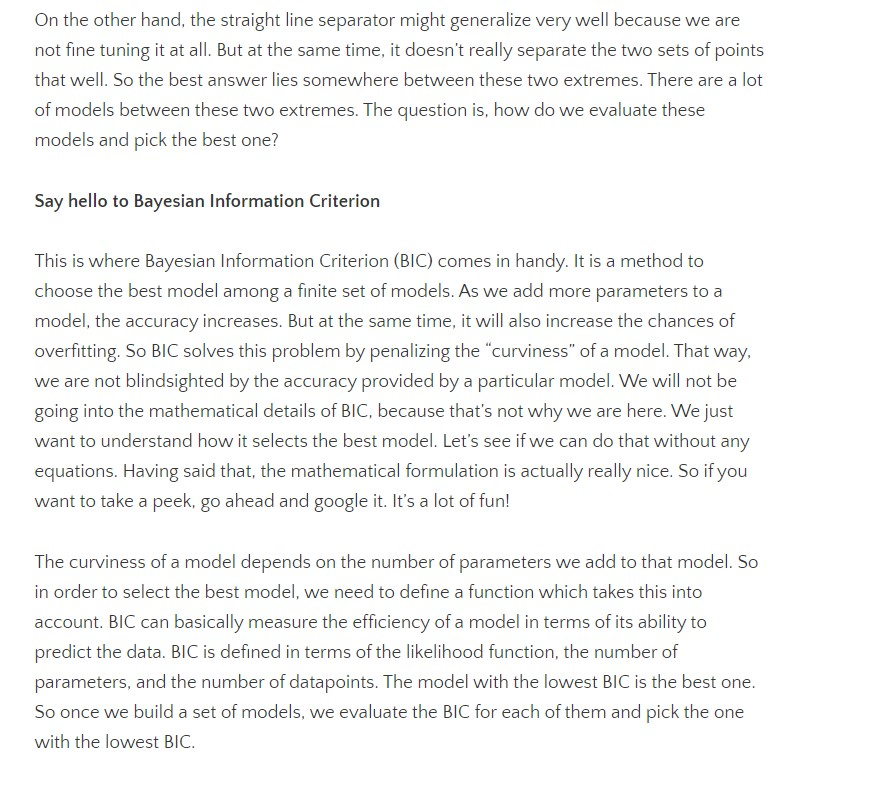

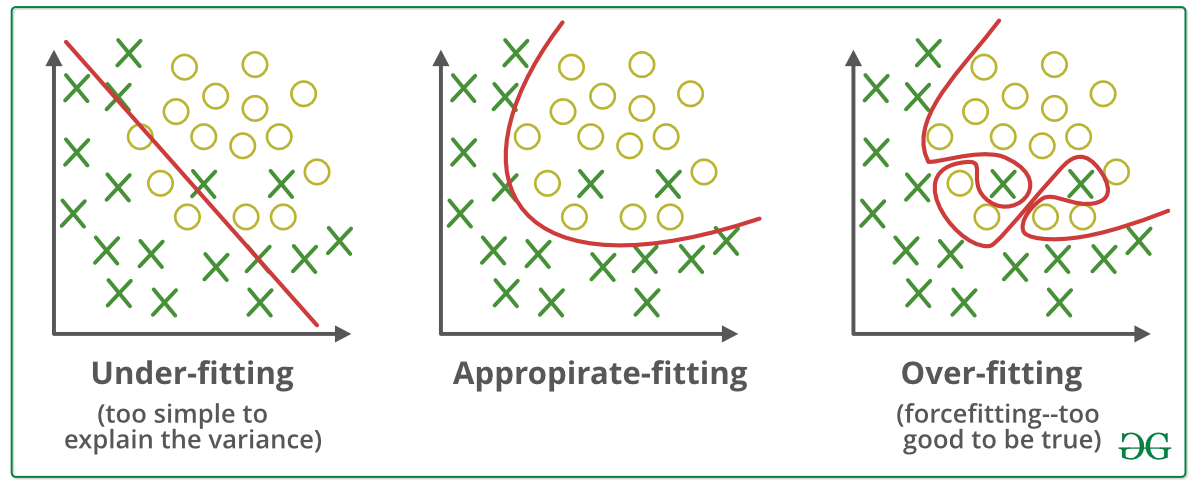

In [199]:
results.bic

-139.74997769478875

In [200]:
# Build our models.....
# All features and the log prices....Model 1

In [201]:
# without INDUS and the log prices....Model2

In [202]:
# Without INDUS and AGE with log prices...model3

In [203]:
# we will look at the BIC of all these models...
# we will look at the r sqaure of all these models..

In [204]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results_1 = model.fit()

In [205]:
results_1.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [206]:
results_1.bic

-139.74997769478875

In [207]:
results_1.rsquared

0.7930234826697582

In [208]:
X_incl_const

const      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  \
50     1.0   0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0   
367    1.0  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0   
34     1.0   1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0   
78     1.0   0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0   
172    1.0   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0   
..     ...       ...   ...    ...   ...    ...    ...    ...     ...   ...   
320    1.0   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0   
15     1.0   0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0   
484    1.0   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0   
125    1.0   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0   
265    1.0   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0   

       TAX  PTRATIO       B  LSTAT  
50   243.0     16.8  395.56  13.45  
367  666.0     20.2  131.42  13.33  
34   307.0     21.0  248.31  20.34  
78   398.0     18.7  386.40  12.34  
172  296.0     16.6  396.90  14.69  
..     ...      ...     ...    ...  
320  287.0     19.6  396.90   7.20  
15   307.0     21.0  395.62   8.47  
484  666.0     20.2  370.73  13.34  
125  188.0     19.1  385.02  14.81  
265  264.0     13.0  392.40  10.45  

[404 rows x 14 columns]

In [209]:
X_incl_const = X_incl_const.drop(['INDUS'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_2 = model.fit()

In [210]:
results_2.bic

-145.14508855591163

In [211]:
results_2.rsquared

0.7927126289415163

In [212]:
X_incl_const = X_incl_const.drop(['AGE'], axis =1) # already removed INDUS
model = sm.OLS(y_train, X_incl_const)
results_3 = model.fit()

In [213]:
results_3.bic

-149.49934294224656

In [214]:
results_3.rsquared

0.7918657661852815

In [ ]:
# So what?....the model to go with is model...3...with the least BIC...

In [ ]:
 # we have to give model_3 some more tests...

In [ ]:
# Residual Plot....predicted value on the X axis  vs Residuals on the y axis..

In [215]:
# Residual plots have to be random....there cant be any pattern..

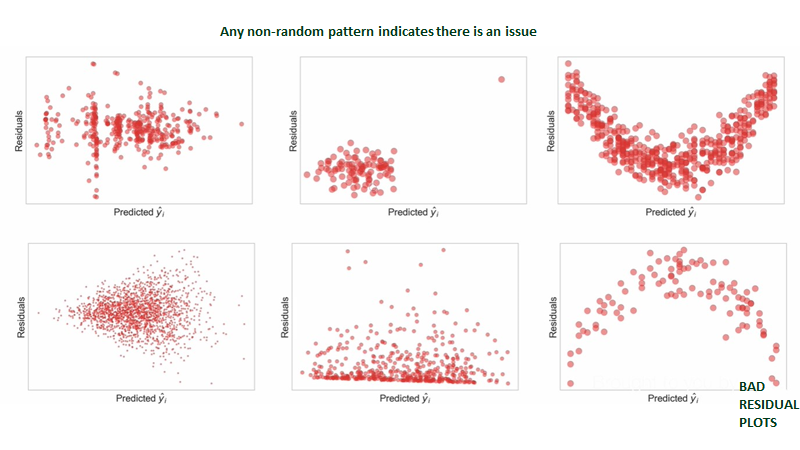

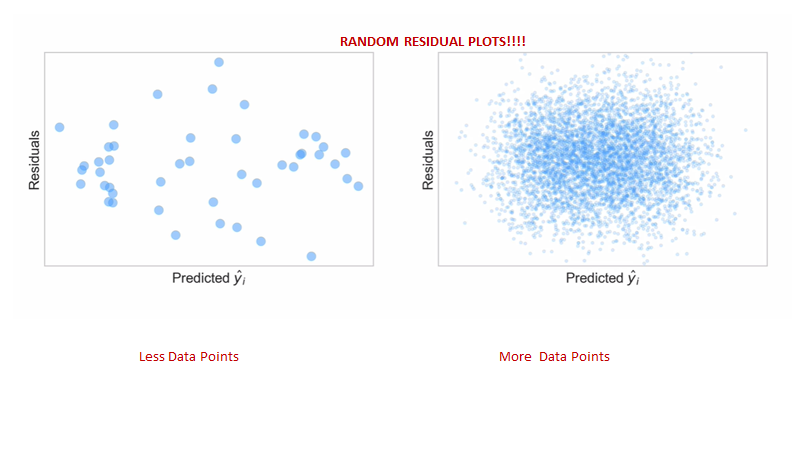

In [216]:
# we will start of all again...

In [217]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [218]:
prices = np.log(data['PRICE'])
prices

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [219]:
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)
features

CRIM    ZN  CHAS    NOX     RM     DIS  RAD    TAX  PTRATIO       B  \
0    0.00632  18.0   0.0  0.538  6.575  4.0900  1.0  296.0     15.3  396.90   
1    0.02731   0.0   0.0  0.469  6.421  4.9671  2.0  242.0     17.8  396.90   
2    0.02729   0.0   0.0  0.469  7.185  4.9671  2.0  242.0     17.8  392.83   
3    0.03237   0.0   0.0  0.458  6.998  6.0622  3.0  222.0     18.7  394.63   
4    0.06905   0.0   0.0  0.458  7.147  6.0622  3.0  222.0     18.7  396.90   
..       ...   ...   ...    ...    ...     ...  ...    ...      ...     ...   
501  0.06263   0.0   0.0  0.573  6.593  2.4786  1.0  273.0     21.0  391.99   
502  0.04527   0.0   0.0  0.573  6.120  2.2875  1.0  273.0     21.0  396.90   
503  0.06076   0.0   0.0  0.573  6.976  2.1675  1.0  273.0     21.0  396.90   
504  0.10959   0.0   0.0  0.573  6.794  2.3889  1.0  273.0     21.0  393.45   
505  0.04741   0.0   0.0  0.573  6.030  2.5050  1.0  273.0     21.0  396.90   

     LSTAT  
0     4.98  
1     9.14  
2     4.03  
3     2.94  
4     5.33  
..     ...  
501   9.67  
502   9.08  
503   5.64  
504   6.48  
505   7.88  

[506 rows x 11 columns]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=0.2, random_state=10)

In [221]:
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [222]:
results.fittedvalues

50     3.036761
367    2.641618
34     2.636558
78     3.010481
172    3.106591
         ...   
320    3.210937
15     3.023876
484    2.950400
125    3.054849
265    3.341354
Length: 404, dtype: float64

In [223]:
results.resid

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

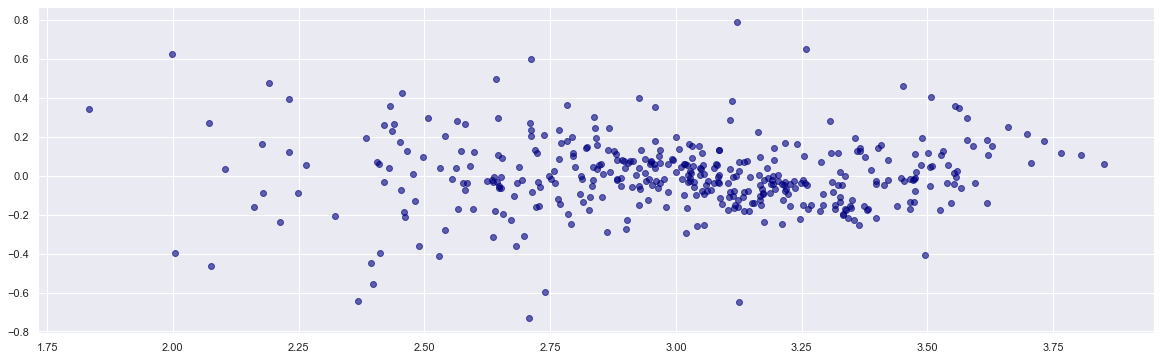

In [224]:
plt.figure(figsize=(20,6))

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)


plt.show()

In [225]:
# Residual plot after dropping INDUS and AGE are random....
# Model_3 is good to go...

In [226]:
# residuals should have normal distribution checking the mean and the skew....

In [227]:
round(results.resid.mean(),2)

-0.0

In [228]:
round(results.resid.skew(),2)

0.12

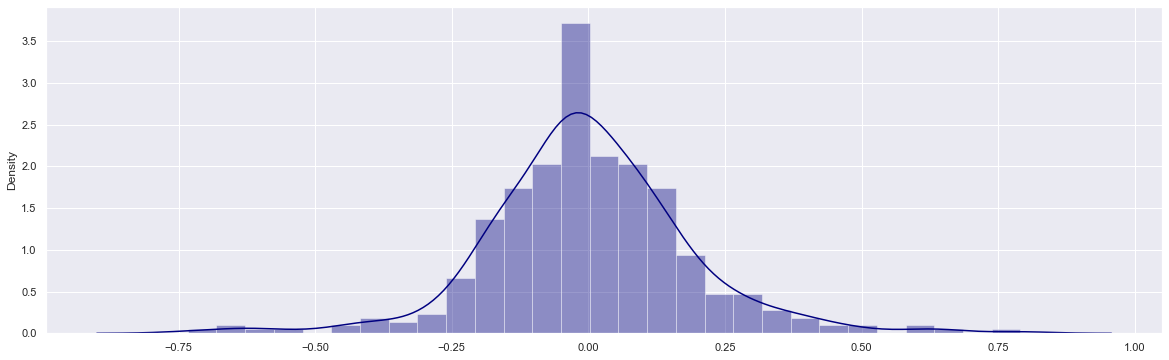

In [229]:
plt.figure(figsize= (20,6))
sns.distplot(results.resid, color='navy')
plt.show()

In [230]:
# we will go with model_3, that means...drop INDUS, drop AGE and prices will be log prices..

In [231]:
# ....crazy idea...dropping features at random hoping to improve the BIC....

In [232]:
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)
features

ZN  CHAS     DIS  RAD    TAX  PTRATIO       B
0    18.0   0.0  4.0900  1.0  296.0     15.3  396.90
1     0.0   0.0  4.9671  2.0  242.0     17.8  396.90
2     0.0   0.0  4.9671  2.0  242.0     17.8  392.83
3     0.0   0.0  6.0622  3.0  222.0     18.7  394.63
4     0.0   0.0  6.0622  3.0  222.0     18.7  396.90
..    ...   ...     ...  ...    ...      ...     ...
501   0.0   0.0  2.4786  1.0  273.0     21.0  391.99
502   0.0   0.0  2.2875  1.0  273.0     21.0  396.90
503   0.0   0.0  2.1675  1.0  273.0     21.0  396.90
504   0.0   0.0  2.3889  1.0  273.0     21.0  393.45
505   0.0   0.0  2.5050  1.0  273.0     21.0  396.90

[506 rows x 7 columns]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

In [234]:
results.bic

211.6927723817349

In [235]:
# crazy idea is not working...

In [ ]:
# residual plot....after dropping features at random..

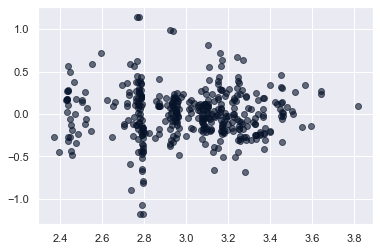

In [236]:
plt.scatter(x=results.fittedvalues, y=results.resid, c='#061329', alpha=0.6)
plt.show()

In [ ]:
# we can spot patterns above...

In [ ]:
# Conclusion...dropping features without reason...will result in a bad model...

In [ ]:
# MODEL_3 finally...

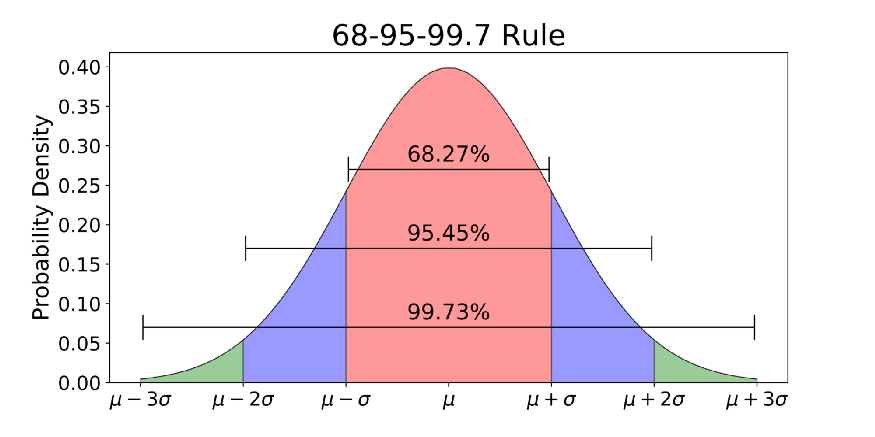

In [ ]:
# Car = 5lakhs....INR...
# Broker....range.........4.5 and 5.5

In [ ]:
# redoing model_3

In [237]:
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=0.2, random_state=10)
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [238]:
results.mse_resid # MSE

0.034873370823545975

In [239]:
np.sqrt(results.mse_resid) # sqrt of the MSE

0.18674413196549436

In [240]:
# I have a house...in boston...and I think it will fetch $ 30,000
# for a 95% prediction interval, what will be the upper bound and the lower bound..

In [241]:
upper_bound = np.log(30) + 2*np.sqrt(results.mse_resid)
upper_bound

3.774685645593144

In [242]:
lower_bound = np.log(30) - 2*np.sqrt(results.mse_resid)
lower_bound

3.027709117731167

In [243]:
# upper bound in dollars..
np.e**upper_bound*1000

43583.8054007552

In [244]:
# lower bound in dollars..
np.e**lower_bound*1000

20649.87193579029

In [ ]:
# $30,000...upper will be 43583 and lower will be 20649

In [ ]:
# I have a house, by the CHARLES RIVER, in a neigbourhood which has a school with PT RATIO = 25 and the house has 10 rooms
# use model_3 (log prices, drop INDUS and AGE), and get the upper and lower bound for a prediction interval of 68%

In [ ]:
# I will look at this next year...